# LM Bias Weight Visualization

In this notebook, we will visualize the bias weights of the fully trained Qwen model. The bias weights are the final LM Head's Bias weights. Here, we tried to visualize the bias weights of the Qwen model, such that we can see how the model is biased towards certain tokens. 

In [ ]:
import torch
import torch.nn as nn
from transformers import AutoTokenizer

model = torch.load('../checkpoint/checkpoint_final.pth', map_location='cpu', weights_only=False)
# print(f"Weights loaded from {model['model']}.")
model_name = "Qwen/Qwen2.5-0.5B-Instruct"
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)

C:\Users\yuche\AppData\Local\Temp\ipykernel_29008\874566685.py:74: UserWarning: Glyph 40519 (\N{CJK UNIFIED IDEOGRAPH-9E47}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\yuche\AppData\Local\Temp\ipykernel_29008\874566685.py:74: UserWarning: Glyph 31131 (\N{CJK UNIFIED IDEOGRAPH-799B}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\yuche\AppData\Local\Temp\ipykernel_29008\874566685.py:74: UserWarning: Glyph 30060 (\N{CJK UNIFIED IDEOGRAPH-756C}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\yuche\AppData\Local\Temp\ipykernel_29008\874566685.py:74: UserWarning: Glyph 33536 (\N{CJK UNIFIED IDEOGRAPH-8300}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\yuche\AppData\Local\Temp\ipykernel_29008\874566685.py:74: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from font(s) Arial.
  plt.tight_layout()


<Figure size 1400x1500 with 0 Axes>

c:\Users\yuche\OneDrive\Documents\Brain in a vat\CAM Mphil\Lent\CourseWork\M2 Course Work\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 40519 (\N{CJK UNIFIED IDEOGRAPH-9E47}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\yuche\OneDrive\Documents\Brain in a vat\CAM Mphil\Lent\CourseWork\M2 Course Work\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31131 (\N{CJK UNIFIED IDEOGRAPH-799B}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\yuche\OneDrive\Documents\Brain in a vat\CAM Mphil\Lent\CourseWork\M2 Course Work\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30060 (\N{CJK UNIFIED IDEOGRAPH-756C}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\yuche\OneDrive\Documents\Brain in a vat\CAM Mphil\Lent\CourseWork\M2 Course Work\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 33536 (\N{CJK UNI

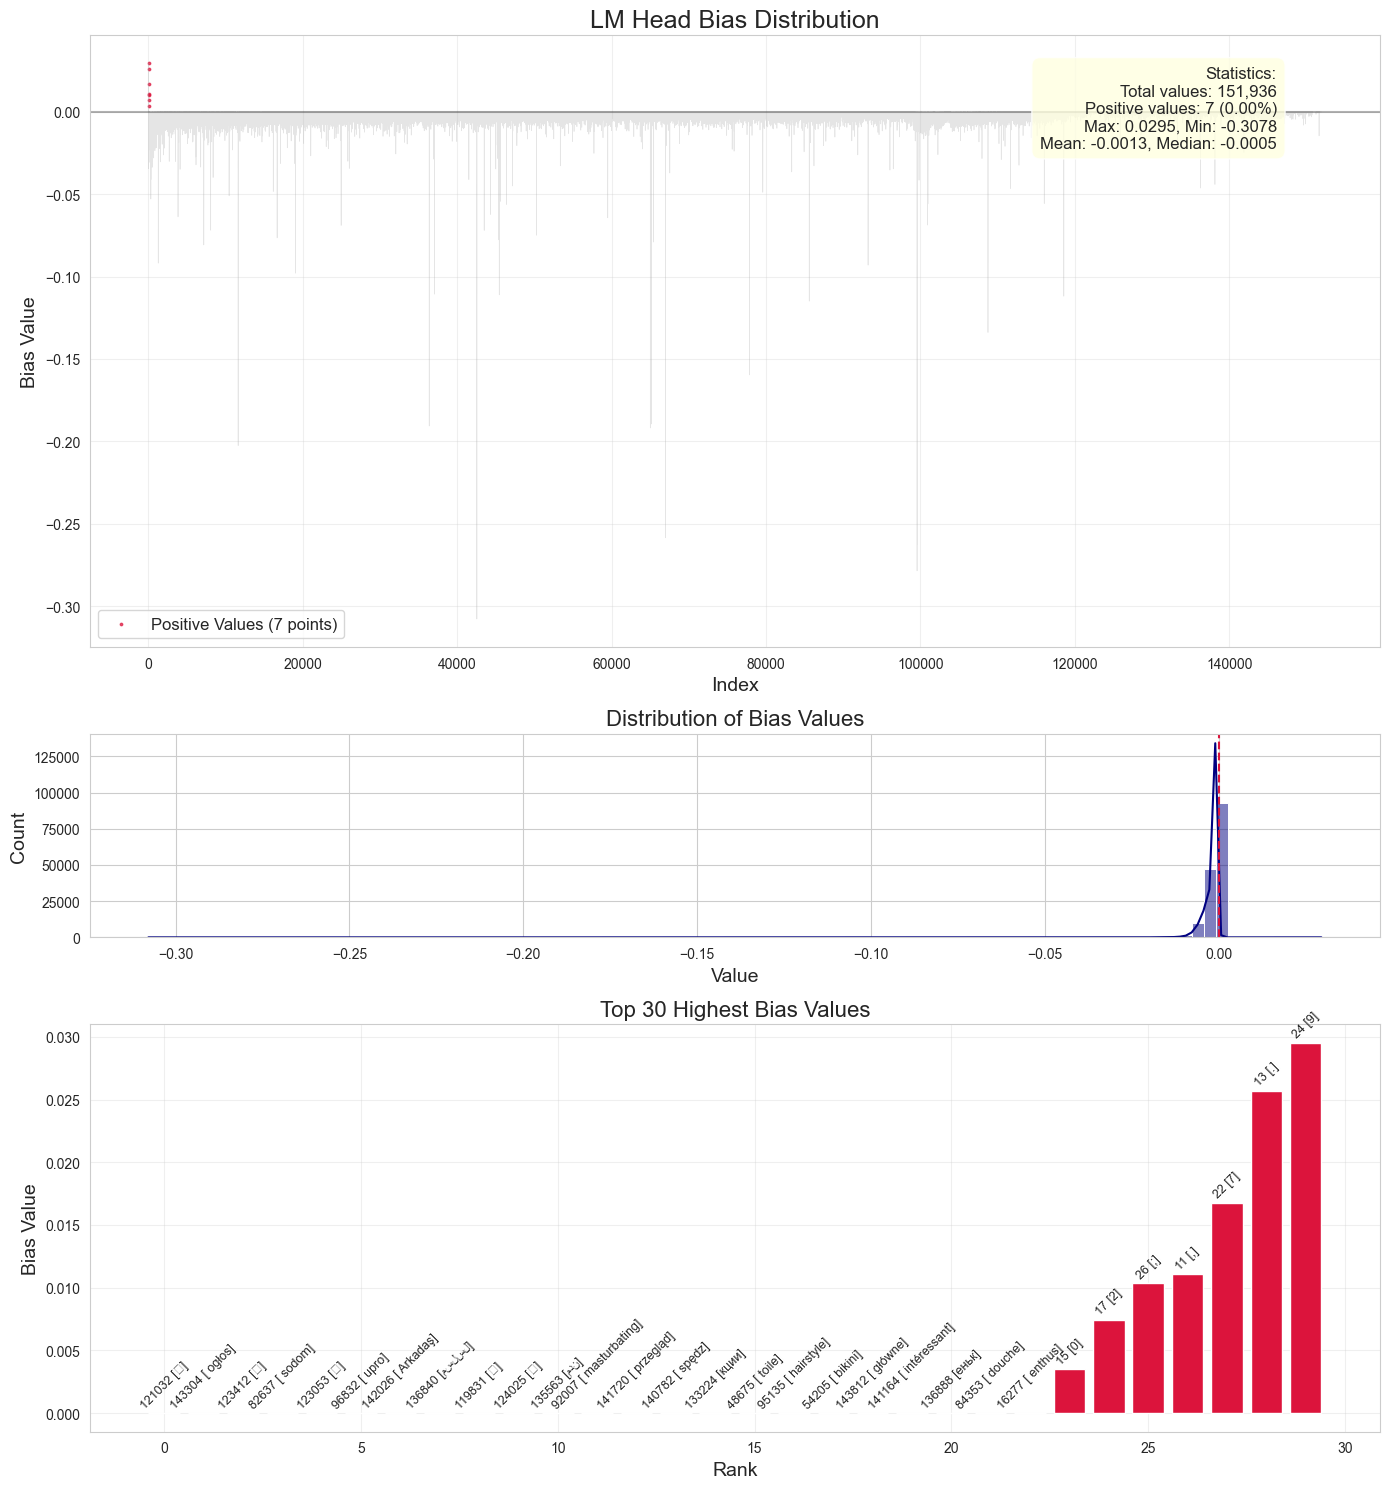

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get the tensor data
bias_tensor = model['model']['lm_head.bias'].cpu().detach().numpy()

# Set up the figure with a nice style
plt.figure(figsize=(14, 15))
sns.set_style("whitegrid")
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 15), gridspec_kw={'height_ratios': [3, 1, 2]})

# 1. Main visualization showing all values with positive values highlighted
x = np.arange(len(bias_tensor))
ax1.plot(x, bias_tensor, color='#AAAAAA', alpha=0.3, linewidth=0.5)

# Highlight positive values
positive_mask = bias_tensor > 0
positive_x = x[positive_mask]
positive_y = bias_tensor[positive_mask]
ax1.scatter(positive_x, positive_y, color='crimson', s=3, alpha=0.7, 
            label=f'Positive Values ({len(positive_y)} points)')
ax1.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Formatting
ax1.set_title('LM Head Bias Distribution', fontsize=18)
ax1.set_xlabel('Index', fontsize=14)
ax1.set_ylabel('Bias Value', fontsize=14)
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=12)

# Add statistics about sparsity
stats = f"Statistics:\n"
stats += f"Total values: {len(bias_tensor):,}\n"
stats += f"Positive values: {np.sum(positive_mask):,} ({np.sum(positive_mask)/len(bias_tensor)*100:.2f}%)\n"
stats += f"Max: {np.max(bias_tensor):.4f}, Min: {np.min(bias_tensor):.4f}\n"
stats += f"Mean: {np.mean(bias_tensor):.4f}, Median: {np.median(bias_tensor):.4f}"

props = dict(boxstyle='round,pad=0.5', facecolor='lightyellow', alpha=0.8)
ax1.text(0.92, 0.95, stats, transform=ax1.transAxes, fontsize=12,
        verticalalignment='top', bbox=props, horizontalalignment='right')

# 2. Histogram showing the distribution
sns.histplot(bias_tensor, bins=100, kde=True, ax=ax2, color='navy')
ax2.axvline(x=0, color='crimson', linestyle='--')
ax2.set_title('Distribution of Bias Values', fontsize=16)
ax2.set_xlabel('Value', fontsize=14)
ax2.set_ylabel('Count', fontsize=14)

# 3. Top positive values visualization
num_top = 30
top_indices = np.argsort(bias_tensor)[-num_top:]
top_values = bias_tensor[top_indices]

# I have a tokenizer, so I can get the tokens
top_tokens = [tokenizer.decode([i]) for i in top_indices]

ax3.bar(range(num_top), top_values, color='crimson')
ax3.set_title(f'Top {num_top} Highest Bias Values', fontsize=16)
ax3.set_xlabel('Rank', fontsize=14)
ax3.set_ylabel('Bias Value', fontsize=14)
ax3.grid(True, alpha=0.3)

# Annotate with token indices
for i, (idx, val) in enumerate(zip(top_indices, top_values)):
    ax3.annotate(f"{idx} [{top_tokens[i]}]", 
                 xy=(i, val), 
                 xytext=(0, 4),
                 textcoords='offset points',
                 ha='center',
                 fontsize=9,
                 rotation=45)

plt.tight_layout()
plt.show()


we can notice that only tokens of  `[0, 2, ;, ',', 7, '.', 9]` is positive and the rest are negative. These are the tokens that the model is biased towards. The rest of the tokens are negative, which means that the model is not biased towards them.